<a href="https://colab.research.google.com/github/fragenabhishek/ImageClassification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Load necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image



Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:


# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))



Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
# Now for a single image 
print(X_train[0].shape)



(32, 32, 3)


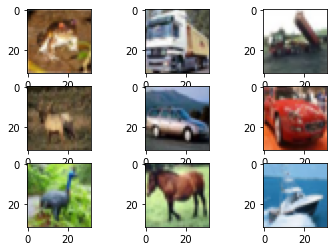

In [ ]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i) #3*3 grid subplot no 1,2,3...9
    img = X_train[i].transpose([0,1,2]) # to show the right image
    plt.imshow(img)
    
# show the plot
plt.show()

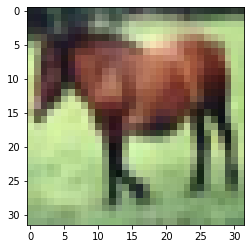

In [ ]:

img = X_train[7].transpose([0,1,2])
plt.imshow(img)

In [ ]:
# preprocessing the data

# fix random seed for reproducibility
# to generate random numbers
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#It is most common to use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately.
# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [ ]:
# smj nhi aaya

# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])



(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [ ]:
#for training model from starting,it takes lot of time
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6 # weight decay changes the function that's being optimized, while momentum changes the path you take to the optimum.
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)      

In [ ]:
epochs = 100
batch_size = 32
his =model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 387us/step - loss: 0.3390 - accuracy: 0.8982 - val_loss: 1.4997 - val_accuracy: 0.8037
Epoch 2/100
50000/50000 [==============================] - 19s 385us/step - loss: 0.3615 - accuracy: 0.8916 - val_loss: 1.3215 - val_accuracy: 0.7831
Epoch 3/100
50000/50000 [==============================] - 19s 384us/step - loss: 0.4013 - accuracy: 0.8762 - val_loss: 1.3972 - val_accuracy: 0.7818
Epoch 4/100
50000/50000 [==============================] - 19s 386us/step - loss: 0.3439 - accuracy: 0.8951 - val_loss: 1.2986 - val_accuracy: 0.7545
Epoch 5/100
50000/50000 [==============================] - 19s 385us/step - loss: 0.3702 - accuracy: 0.8851 - val_loss: 1.2198 - val_accuracy: 0.8014
Epoch 6/100
50000/50000 [==============================] - 20s 390us/step - loss: 0.3843 - accuracy: 0.8820 - val_loss: 1.2974 - val_accuracy: 0.7913
Epoch 7/100
50000/50000 [=========================

In [ ]:
history=his.history

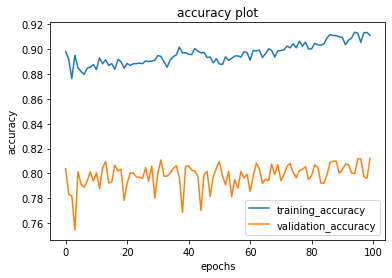

In [ ]:
plt.plot(history['accuracy'],label='training_accuracy')
plt.plot(history['val_accuracy'],label='validation_accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy plot")
plt.legend()
plt.show()

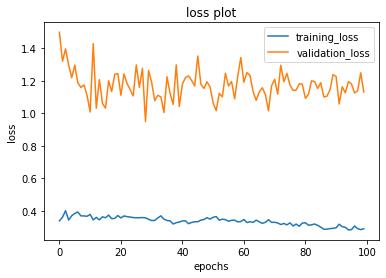

In [ ]:
plt.plot(history['loss'],label='training_loss')
plt.plot(history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("loss plot")
plt.show()

In [ ]:
model.save_weights("model_weights.h5")

In [ ]:
#use pre trained weight,no need to train agaian 
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model and defining weight from all_cnn model file
weights="model_weights.h5"
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())



# testing model with pre train weights
scores=model.evaluate(X_test,Y_test,verbose=1)
print("accuaracy: ()",format(scores[1]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)      

In [ ]:


# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[1:10]
labels = np.argmax(Y_test[1:10],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)



9/9 [==============================] - 0s 4ms/step


In [ ]:
# print our predictions
print (predictions)

[[1.7572715e-12 9.4692859e-06 2.8669426e-25 3.2475767e-28 9.1610281e-26
  1.6191903e-26 3.7662030e-22 4.8734978e-28 9.9999058e-01 5.0609199e-14]
 [1.8942694e-09 1.7705938e-09 1.2606694e-13 3.5159552e-18 7.8292632e-16
  4.2788845e-17 8.3859115e-14 4.1742330e-18 1.0000000e+00 1.4147402e-09]
 [9.9999940e-01 3.3610843e-09 5.8525853e-07 4.6969243e-13 3.3088445e-12
  2.7949675e-14 1.4896324e-13 2.0148131e-15 5.5172422e-10 1.1841142e-10]
 [4.6929024e-37 1.6587318e-31 1.4476464e-20 8.7992504e-24 8.3929097e-24
  6.0728340e-30 1.0000000e+00 0.0000000e+00 6.2337092e-37 0.0000000e+00]
 [1.1658529e-12 1.4818171e-09 9.9519077e-09 6.5463541e-06 2.3729913e-04
  1.0876418e-01 8.9099187e-01 5.3111702e-08 1.6085608e-10 1.5674747e-08]
 [8.9584682e-13 9.9999988e-01 1.6276866e-22 1.6419361e-15 5.1101163e-29
  2.8311879e-20 3.1698123e-20 2.3647555e-17 8.7548283e-22 1.3219049e-07]
 [4.3484738e-10 1.4466037e-09 4.4387903e-07 1.0422134e-06 5.4461316e-06
  5.2523340e-08 9.9999285e-01 5.3329985e-09 1.3685920e-07 

In [ ]:


# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))



1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0


In [ ]:


# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print (class_result)



[8 8 0 6 6 1 6 3 8]


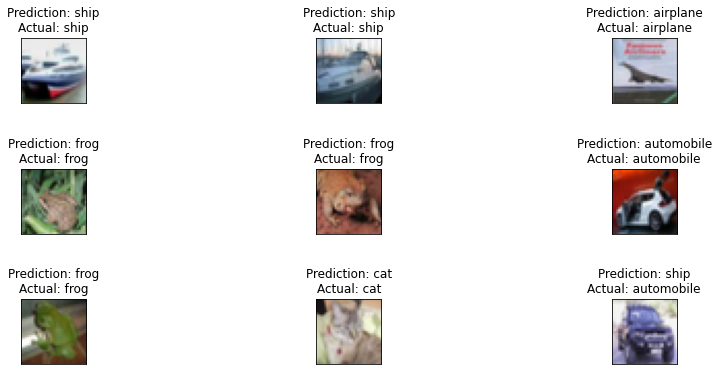

In [ ]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)#the amount of height reserved for space between subplots
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([0,1,2]))
    
# show the plot
plt.show()

In [ ]:
#model.save("model.h5")

In [ ]:
#model.save_weights("model_weights.h5")

In [ ]:
# generate batch of 1 image to predict
batch = X_test[11:12]
labels = np.argmax(Y_test[1:2],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 4ms/step


In [ ]:
print(predictions)

[[0.00000000e+00 1.52791555e-30 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.09866723e-36 1.00000000e+00]]


In [ ]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

1.0


In [ ]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print (class_result)


[9]


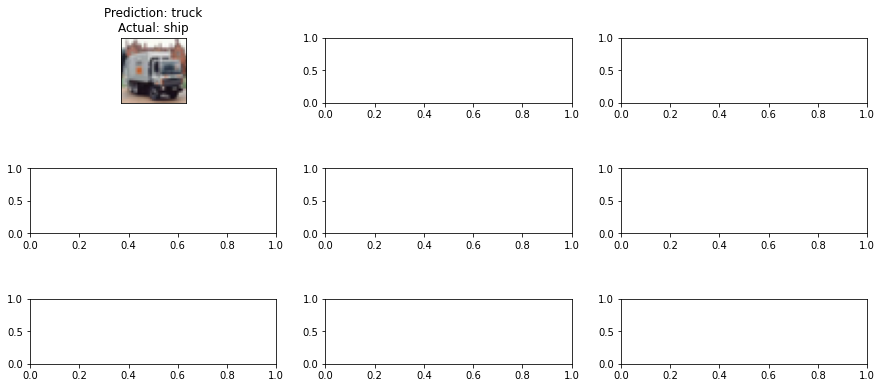

In [ ]:

    
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([0,1,2]))
    
# show the plot
plt.show()
